<a href="https://colab.research.google.com/github/honeybeat1/team1_wanted_onboarding_2nd/blob/master/Regression%EC%9C%BC%EB%A1%9C_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EB%B6%80%EB%8F%99%EC%82%B0_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EA%B8%B0_(EDA_%26_Feature_Selection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 보스턴 부동산 데이터의 특징들(Features)
1. CRIM: 도시별 범죄발생률
2. ZN: 25,000평을 넘는 토지의 비율
3. INDUS: 도시별 비상업 지구의 비유
4. CHAS: 찰스 강의 더미 변수(1 = 강의 경계, 0 = 나머지)
5. NOX: 일산화질소 농도
6. RM: 주거할 수 있는 평균 방의개수
7. AGE: 1940년 이전에 지어진 주택의 비율
8. DIS: 5개의 고용지원센터까지의 가중치가 고려된 거리
9. RAD: 고속도로의 접근 용이성에 대한 지표
10. TAX: 10,000달러당 재산세 비율
11. PTRATIO: 도시별 교사와 학생의 비율 
12. B: 도시의 흑인 거주 비유
13. LSTAT: 저소득층의 비율

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(42)

In [3]:
boston_house_data = load_boston()

In [4]:
boston_house_data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

## 전체 특징(Feature)를 사용한 Linear Regression

In [5]:
X = boston_house_data.data
y = boston_house_data.target

In [6]:
type(X)

numpy.ndarray

In [13]:
X.shape, y.shape

((506, 13), (506,))

In [55]:
# kfold 안하고 train 했다고 하면

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 3), (404,), (102, 3), (102,))

In [58]:
# kfold 안했을때랑 차이가 없음.. 
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
msr = mean_squared_error(y_test, y_pred)
msr

37.703508857022236

In [25]:
from sklearn.model_selection import KFold

num_split = 5
kf = KFold(n_splits=num_split)

avg_MSE = 0.0
lr = LinearRegression()

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)
  #avg_MSE = mean_squared_error(y_test, y_pred)
  
  print('Average MSE : ', avg_MSE/num_split)
  print('Average RMSE : ', np.sqrt(avg_MSE/num_split))


Average MSE :  2.492060113840429
Average RMSE :  1.578626020892988
Average MSE :  7.701784335087355
Average RMSE :  2.7752088813434126
Average MSE :  14.316611931040251
Average RMSE :  3.783729896681349
Average MSE :  30.46908615487963
Average RMSE :  5.519880991006929
Average MSE :  37.13180746769903
Average RMSE :  6.093587405436885


In [ ]:
from sklearn.model_selection import KFold

num_split = 5
kf = KFold(n_splits=num_split)

avg_MSE = 0.0
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # 선형회귀(Linear Regression) 모델 선언하기
  lr = LinearRegression()

  # 선형회귀(Linear Regression) 모델 학습하기
  lr.fit(X_train, y_train)

  # 테스트 데이터에 대한 예측을 수행합니다.
  y_pred = lr.predict(X_test)

  # MSE(Mean Squared Error)를 측정합니다.
  avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)

print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 37.13180746769903
Avergae RMSE : 6.093587405436885


## 상관분석(Correlation Analysis)

In [26]:
boston_house_df = pd.DataFrame(boston_house_data.data, columns = boston_house_data.feature_names)

In [27]:
boston_house_df['PRICE'] = y
boston_house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


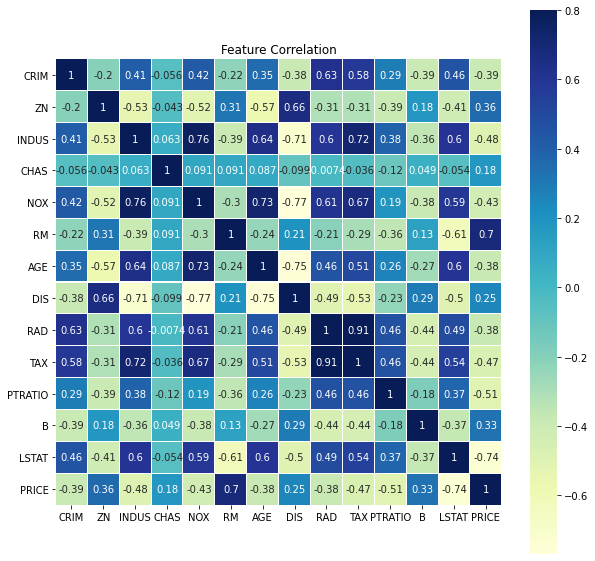

In [28]:
corr = boston_house_df.corr()
plt.figure(figsize=(10, 10));
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation');

In [29]:
full_column_list = boston_house_df.columns.to_list()
full_column_list.remove('PRICE')
full_column_list

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [30]:
len(full_column_list)

13

In [31]:
boston_house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


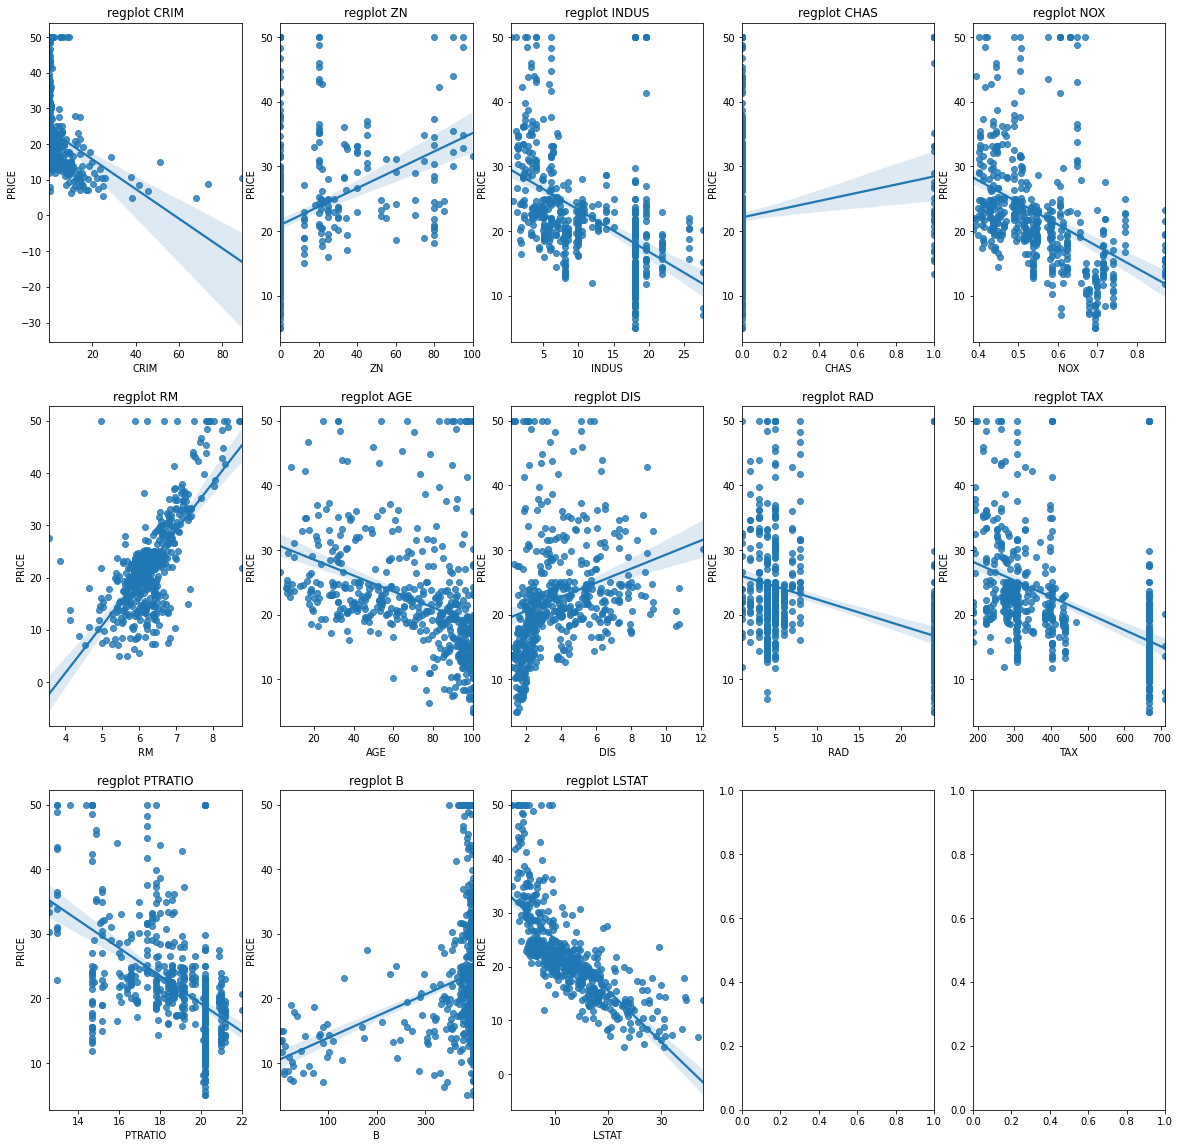

In [32]:
figure, ax_list = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(20,20) 
for i in range(len(full_column_list)): 
  sns.regplot(data=boston_house_df, x=full_column_list[i], y='PRICE', ax=ax_list[int(i/5)][int(i%5)]) 
  ax_list[int(i/5)][int(i%5)].set_title("regplot " + full_column_list[i])

## 유의미한 Feature들만을 남기는 Feature Selection

In [33]:
print(type(corr))
corr

<class 'pandas.core.frame.DataFrame'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [38]:
feature_lst = corr.query("PRICE > 0.5 or PRICE < -0.5").index.values.tolist()
feature_lst.remove('PRICE')
feature_lst

['RM', 'PTRATIO', 'LSTAT']

In [40]:
useful_feature_list = corr.query("PRICE > 0.5 or PRICE < -0.5").index.values.tolist()
useful_feature_list.remove('PRICE')
print(useful_feature_list)

['RM', 'PTRATIO', 'LSTAT']


In [41]:
X = boston_house_df.loc[:,useful_feature_list].values
y = boston_house_df.iloc[:,-1].values

In [ ]:
y

In [42]:
print(X.shape)
print(y.shape)

(506, 3)
(506,)


In [45]:
removed_column_list = list(set(full_column_list) - set(useful_feature_list))
print(removed_column_list)

['TAX', 'DIS', 'INDUS', 'ZN', 'B', 'CRIM', 'CHAS', 'RAD', 'AGE', 'NOX']


In [46]:
X

array([[ 6.575, 15.3  ,  4.98 ],
       [ 6.421, 17.8  ,  9.14 ],
       [ 7.185, 17.8  ,  4.03 ],
       ...,
       [ 6.976, 21.   ,  5.64 ],
       [ 6.794, 21.   ,  6.48 ],
       [ 6.03 , 21.   ,  7.88 ]])

In [47]:
X.shape

(506, 3)

In [ ]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [48]:
num_split = 5

kf = KFold(n_splits=num_split)

avg_MSE = 0.0

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # 선형회귀(Linear Regression) 모델 선언하기
  lr = LinearRegression()

  # 선형회귀(Linear Regression) 모델 학습하기
  lr.fit(X_train, y_train)

  # 테스트 데이터에 대한 예측을 수행합니다.
  y_pred = lr.predict(X_test)

  # MSE(Mean Squared Error)를 측정합니다.
  avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)

print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 34.10008149030686
Avergae RMSE : 5.839527505741099
